### PERFORMANCE

Se va a proceder a realizar una limpieza del dataset Performace y a la modificación de las variables para su posterior uso para la segmentación de clientes.

1.Se **importan** las librerias a usar y el dataset y se observan las diferentes variables que tiene dicho dataset.

In [23]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

url_test_perf = 'https://raw.githubusercontent.com/llunasanz/data-project-3/main/raw_data/test_performance.csv'
url_train_perf = 'https://raw.githubusercontent.com/llunasanz/data-project-3/main/raw_data/train_performance.csv'

In [24]:
# Usamos pandas para leer de los csv 
df_tr_performance = pd.read_csv(url_train_perf)
df_ts_performance = pd.read_csv(url_test_perf)

files = [df_tr_performance, df_ts_performance]
df = pd.concat(files)
df

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56.000000,2017-07-25 07:22:47.000000,30000.0,34500.0,30,NaN,Good
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41.000000,2017-07-05 16:04:18.000000,15000.0,17250.0,30,NaN,Good
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57.000000,2017-07-06 13:52:51.000000,20000.0,22250.0,15,NaN,Good
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41.000000,2017-07-27 18:00:35.000000,10000.0,11500.0,15,NaN,Good
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45.000000,2017-07-03 22:42:39.000000,40000.0,44000.0,30,NaN,Good
...,...,...,...,...,...,...,...,...,...,...
1445,8a858fb45bb59c21015bb88a191f58f2,301991141,3,47:02.0,46:53.0,10000.0,11500.0,15,NaN,NaN
1446,8a858fcb5b00cc54015b0253ced26a5f,301963018,3,00:45.0,04:05.0,10000.0,13000.0,30,NaN,NaN
1447,8a858fde56eb02280156f59b976d46c0,301994653,9,09:40.0,09:33.0,40000.0,48000.0,60,NaN,NaN
1448,8a858e10570f2d65015717fcfec44996,301961483,14,47:54.0,46:49.0,60000.0,68100.0,90,NaN,NaN


2.Se observan el número de **NA** que hay por variable, con el objetivo de eliminar aquellas con un porcentage mayor al 15% del total.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: null_counts is deprecated. Use show_counts instead
  This is separate from the ipykernel package so we can avoid doing imports until


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5818 entries, 0 to 1449
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   customerid     5818 non-null   object 
 1   systemloanid   5818 non-null   int64  
 2   loannumber     5818 non-null   int64  
 3   approveddate   5818 non-null   object 
 4   creationdate   5818 non-null   object 
 5   loanamount     5818 non-null   float64
 6   totaldue       5818 non-null   float64
 7   termdays       5818 non-null   int64  
 8   referredby     771 non-null    object 
 9   good_bad_flag  4368 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 500.0+ KB


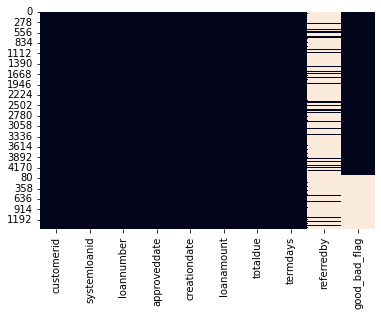

In [25]:
import seaborn as sns
df.isnull()
df.info(verbose=True,null_counts=True)
sns.heatmap(df.isnull(), cbar=False)

3. Se eliminan aquellas variables:
    - Número de NA mayor al 15%: **referredby** y **good_bag_flag**
    - Formato fecha: **approveddate** y **creationdate**
    - Valores únicos: **systemloadid**
    - No interés para el clustering: **loannumber**


In [26]:
df.drop(['referredby', 'good_bad_flag', 'approveddate', 'creationdate','systemloanid','loannumber'], axis=1, inplace = True)
df

,customerid,loanamount,totaldue,termdays
0,8a2a81a74ce8c05d014cfb32a0da1049,30000.0,34500.0,30
1,8a85886e54beabf90154c0a29ae757c0,15000.0,17250.0,30
2,8a8588f35438fe12015444567666018e,20000.0,22250.0,15
3,8a85890754145ace015429211b513e16,10000.0,11500.0,15
4,8a858970548359cc0154883481981866,40000.0,44000.0,30
...,...,...,...,...
1445,8a858fb45bb59c21015bb88a191f58f2,10000.0,11500.0,15
1446,8a858fcb5b00cc54015b0253ced26a5f,10000.0,13000.0,30
1447,8a858fde56eb02280156f59b976d46c0,40000.0,48000.0,60
1448,8a858e10570f2d65015717fcfec44996,60000.0,68100.0,90


4. Nos interesa obtener la **tasa de interés** de cada préstamo ya que se trata de una variable de interés para el clustering. Esto se realiza de a través de las siguientes variables:
    * **Totaldue**
    * **Loanamount**

In [27]:
df['totalamountreturn'] = df['totaldue'] - df['loanamount']
df['interestrate'] =( df['totaldue'] - df['loanamount'] ) / df['totaldue'] * 100
df

,customerid,loanamount,totaldue,termdays,totalamountreturn,interestrate
0,8a2a81a74ce8c05d014cfb32a0da1049,30000.0,34500.0,30,4500.0,13.043478
1,8a85886e54beabf90154c0a29ae757c0,15000.0,17250.0,30,2250.0,13.043478
2,8a8588f35438fe12015444567666018e,20000.0,22250.0,15,2250.0,10.112360
3,8a85890754145ace015429211b513e16,10000.0,11500.0,15,1500.0,13.043478
4,8a858970548359cc0154883481981866,40000.0,44000.0,30,4000.0,9.090909
...,...,...,...,...,...,...
1445,8a858fb45bb59c21015bb88a191f58f2,10000.0,11500.0,15,1500.0,13.043478
1446,8a858fcb5b00cc54015b0253ced26a5f,10000.0,13000.0,30,3000.0,23.076923
1447,8a858fde56eb02280156f59b976d46c0,40000.0,48000.0,60,8000.0,16.666667
1448,8a858e10570f2d65015717fcfec44996,60000.0,68100.0,90,8100.0,11.894273


5. Exportamos el dataset.

In [28]:
df.to_csv('performancelimpio.csv',index=False)